## Analysing and Preparing Data

###Charging Data

In [1]:
# Basic example loading images from the svhn dataset

# Dictionaries
import scipy.io as sio
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import re
from nltk.corpus import stopwords
import string

# Mount Google Drive
drive.mount('/content/drive')
data_path = '/content/drive/MyDrive/DeepLearning_2022/PROJECT/Data/'
results_path = '/content/drive/MyDrive/DeepLearning_2022/PROJECT/Results/'

import csv

# Charge the data

#we read the dataset Sentiment140 for tweet polarity --> 1.6M tweets
data_polarity = pd.read_csv(data_path+'Sentiment140.csv',encoding='utf-8')

#we read the dataset TweetsEmotions for tweet emotions --> 9870 tweets
data_emotion = pd.read_csv(data_path+'TweetsEmotions.csv', index_col = 0)
data_emotion2 = pd.read_csv(data_path+'emotions2.csv', index_col = 0)

#we read the datasets
data_emoji = pd.read_csv(data_path+'emoticons_polarity_emotion_filtered.csv',index_col = 0)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###Preparing Data emotion data

In [2]:
data_em = {"Feeling":[]}
data_em = pd.DataFrame(data_em)

data_em["Feeling"]=data_emotion2["Feeling"]
data_em.index.name = 'Tweets'
data_em.reset_index(inplace=True)

In [3]:
print(data_em)

                                                  Tweets  Feeling
0                                i didnt feel humiliated  sadness
1      i can go from feeling so hopeless to so damned...  sadness
2       im grabbing a minute to post i feel greedy wrong    anger
3      i am ever feeling nostalgic about the fireplac...     love
4                                   i am feeling grouchy    anger
...                                                  ...      ...
15995  i just had a very brief time in the beanbag an...  sadness
15996  i am now turning and i feel pathetic that i am...  sadness
15997                     i feel strong and good overall      joy
15998  i feel like this was such a rude comment and i...    anger
15999  i know a lot but i feel so stupid because i ca...  sadness

[16000 rows x 2 columns]


In [4]:
print(data_em.columns)

Index(['Tweets', 'Feeling'], dtype='object')


In [5]:

# Again not all types have the same amount of data, dangerous
print(data_em["Feeling"].value_counts())

joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: Feeling, dtype: int64


In [6]:
print(data_em[data_em['Feeling']=='surprise'])

                                                  Tweets   Feeling
6      ive been taking or milligrams or times recomme...  surprise
32     i have seen heard and read over the past coupl...  surprise
57     i keep feeling pleasantly surprised at his sup...  surprise
64     i am now nearly finished the week detox and i ...  surprise
129    i too feel as if i am a stranger in a strange ...  surprise
...                                                  ...       ...
15871  i spent a lot of time feeling a bit stunned th...  surprise
15943  i believe the most readers feel impressed by t...  surprise
15970      i have to admit im feeling pretty overwhelmed  surprise
15974  i am feeling much like the guy in the pic abov...  surprise
15989  i need to do this that and the other for colle...  surprise

[572 rows x 2 columns]


In [7]:
data_e = data_emotion[['Tweets','Feeling']]
print(data_e)
print(data_e['Feeling'].value_counts())
data_e = data_e.append(data_em[data_em['Feeling']=='surprise'],ignore_index=True)
print(data_e)

                                                  Tweets Feeling
Sl no                                                           
1       #1: @fe ed "RT @MirayaDizon1: Time is ticking...   happy
2       #2: @蓮花 &はすか ed "RT @ninjaryugo: ＃コナモンの日 だそうで...   happy
3       #3: @Ris ♡ ed "Happy birthday to one smokin h...   happy
4       #4: @월월 [씍쯴사랑로봇] jwinnie is the best, cheer u...   happy
5       #5: @Madhurima wth u vc♥ ed "Good morning dea...   happy
...                                                  ...     ...
10016  Tweet #85: @Matteo tweeted "@GameSpot @Frannkc...   angry
10017  Tweet #86: @𝐚𝐧𝐢𝐬𝐭𝐨𝐧 tweeted "@BRATgiirl_ that’...   angry
10018  Tweet #87: @Chowkidar Ricky Sharma tweeted "@M...   angry
10019  Tweet #88: @Katoe.EXE tweeted "u know what i h...   angry
10019  Tweet #88: @Katoe.EXE tweeted "u know what i h...   angry

[10017 rows x 2 columns]
happy       3928
sad         2849
angry       1341
fear         863
disgust      637
surprise     399
Name: Feeling, dtype: int64

In [8]:
data_e = data_e.drop(10019)

In [9]:
data_e['Feeling'].value_counts()

happy       3928
sad         2849
angry       1341
surprise     970
fear         863
disgust      637
Name: Feeling, dtype: int64

In [10]:
from sklearn.utils import shuffle
data_e= shuffle(data_e)

In [11]:
for i, row in data_e.iterrows():
  if data_e.loc[i, "Feeling"] == "happy" or data_e.loc[i, "Feeling"] == "surprise":
    data_e.loc[i, "Polarity"] = 1
  elif data_e.loc[i, "Feeling"] == "sad" or data_e.loc[i, "Feeling"] == "angry" or data_e.loc[i, "Feeling"] == "fear" or data_e.loc[i, "Feeling"] == "disgust":
    data_e.loc[i, "Polarity"] = 0

data_e.reindex()
data_e_0 = data_e[data_e["Polarity"] == 0].reindex()
data_e_1 = data_e[data_e["Polarity"] == 1].reindex()

In [12]:
data_e["Polarity"].value_counts()

0.0    5690
1.0    4898
Name: Polarity, dtype: int64

In [13]:
for i,row  in data_e_0.iterrows():
  if data_e_0.loc[i, "Feeling"] == "sad":
    data_e_0.loc[i, "Feeling"] = 1
  elif data_e_0.loc[i, "Feeling"] == "angry":
    data_e_0.loc[i, "Feeling"] = 0.67
  elif data_e_0.loc[i, "Feeling"] == "fear":
    data_e_0.loc[i, "Feeling"] = 0.33
  elif data_e_0.loc[i, "Feeling"] == "disgust":
    data_e_0.loc[i, "Feeling"] = 0

for i,row  in data_e_1.iterrows():
  if data_e_1.loc[i, "Feeling"] == "happy":
    data_e_1.loc[i, "Feeling"] = 1
  elif data_e_1.loc[i, "Feeling"] == "surprise":
    data_e_1.loc[i, "Feeling"] = 0

In [14]:
print(data_e_1["Feeling"].value_counts())
data_e_1_s = data_e_1[data_e_1["Feeling"] == 0]
data_e_1_h = data_e_1[data_e_1["Feeling"] == 1]

data_e_1_s = data_e_1_s.sample(n=970)
data_e_1_h = data_e_1_h.sample(n=970)

data_e_1 = data_e_1_s.append(data_e_1_h,ignore_index=True)

data_e_1 = shuffle(data_e_1)

print(data_e_1["Feeling"].value_counts())

1    3928
0     970
Name: Feeling, dtype: int64
1    970
0    970
Name: Feeling, dtype: int64


###Preparing Data Emotion Polarity 1

In [15]:
import re
from string import punctuation

all_tweets_e_1 = list()

for t in data_e_1["Tweets"]:
  #t = 'a ' + t
  #t = re.sub("(?:\s)@[^, ]*", '', t)
  #t = re.sub("(?:\s)#[^, ]*", '', t)
  t = t[4:]
  t = t.lower()
  t = "".join([ch for ch in t if ch not in punctuation])
  all_tweets_e_1.append(t)

all_text = " ".join(all_tweets_e_1)
all_words = all_text.split()

In [16]:
from collections import Counter 
# Count all the words using Counter Method
count_words = Counter(all_words)
total_words=len(all_words)
sorted_words=count_words.most_common(total_words)
print("Top ten occuring words : ",sorted_words[:10])

Top ten occuring words :  [('ed', 1374), ('the', 1142), ('and', 854), ('to', 801), ('a', 788), ('i', 751), ('rt', 731), ('of', 619), ('you', 426), ('in', 421)]


In [17]:
vocab_to_int={w:i+1 for i,(w,c) in enumerate(sorted_words)}

In [18]:
encoded_tweets=list()
iter_1 = 0
iter_2 = 0
for t in all_tweets_e_1:
  encoded_tweet=list()
  for word in t.split():
    if word not in vocab_to_int.keys():
      #if word is not available in vocab_to_int put 0 in that place
      encoded_tweet.append(0)
      iter_1 += 1
    else:
      iter_2 += 1
      encoded_tweet.append(vocab_to_int[word])
  encoded_tweets.append(encoded_tweet)
print(iter_1)
print(iter_2)
print(encoded_tweets[0])

0
41894
[2997, 2998, 1752, 2999, 3000, 1, 7, 3001, 55, 576, 4, 577, 14, 990, 3002, 10, 2, 3003, 8, 3004, 10, 13, 6, 3005, 2, 521, 8, 356, 10, 3006, 3007]


In [19]:
sequence_length = 0
for i, tweet in enumerate(encoded_tweets):
  if len(tweet) > sequence_length:
    sequence_length = len(tweet)

features_e_1 = []
for i, tweet in enumerate(encoded_tweets):
  tweet_len=len(tweet)
  if (tweet_len<=sequence_length):
    zeros=list(np.zeros(sequence_length-tweet_len))
    new=zeros+tweet
  else:
    new=tweet[:sequence_length]
  features_e_1.append(np.array(new))

### Preparing Data Emoji

In [20]:
# Again not all types have the same number of data, dangerous
print(data_emoji)
print(data_emoji["emotion"].value_counts())

                                                  tweet  \
0     The woman who was forced into child labour dur...   
1     A group of children who fled #Mariupol are now...   
2     @MZavala86 @RT_com Dictator Vladimir Putin has...   
3     Yesterday in Brussels during a peaceful strike...   
4     😡 The Russians who left the #Chornobyl nuclear...   
...                                                 ...   
2068  Let’s stop the russian spelling and name it th...   
2069  #Lysychansk after #Putin 🤬 #Лисичанськ #Україн...   
2070  This is really brutal! 🤬\n\nA Ukrainian office...   
2071  Hey #Germany! Are you going to start using #pe...   
2072  Go figure ...India won't condemn Russia for (t...   

                          emoji  polarity  emotion  
0                         ['😭']         0        3  
1                         ['😭']         0        3  
2                         ['😂']         1        1  
3                         ['😓']         0        3  
4                         

In [21]:
data_emoji_1 = data_emoji[data_emoji["polarity"]==1]
data_emoji_1["emotion"].value_counts()

1    1103
2      23
Name: emotion, dtype: int64

In [22]:
for i,row in data_emoji_1.iterrows():
  if (data_emoji_1.loc[i,"emotion"]==2):
    data_emoji_1.loc[i,"emotion"]=0
  elif (data_emoji_1.loc[i,"emotion"]==1):
    data_emoji_1.loc[i,"emotion"]=1

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [23]:
data_emoji_1.head()

,tweet,emoji,polarity,emotion
2,@MZavala86 @RT_com Dictator Vladimir Putin has...,['😂'],1,1
6,@AnonymousVideo I been using https://1920 to s...,['😂'],1,1
9,@AnonymousVideo I been using https://1920 to s...,['😂'],1,1
10,"#Ukraine? Europe? US? UK? #NATO? ""Dark Secret ...",['😂'],1,1
11,Don’t mention the war 😂 \n#UkraineRussiaWar #O...,['😂'],1,1


In [24]:
data_emoji_1["emotion"].value_counts()

print(data_emoji_1["emotion"].value_counts())
data_emoji_1_h = data_emoji_1[data_emoji_1["emotion"] == 0]
data_emoji_1_s = data_emoji_1[data_emoji_1["emotion"] == 1]

data_emoji_1_h = data_emoji_1_h.sample(n=23)
data_emoji_1_s = data_emoji_1_s.sample(n=23)

data_emoji_1 = data_emoji_1_s.append(data_emoji_1_h,ignore_index=True)

data_emoji_1 = shuffle(data_emoji_1)

print(data_emoji_1["emotion"].value_counts())

1    1103
0      23
Name: emotion, dtype: int64
1    23
0    23
Name: emotion, dtype: int64


###Analysing tweets

In [25]:
#split_dataset into 80% training , 10% test and 10% Validation Dataset
'''train_x=features[:int(0.8*len(features))]
train_y=data_p_r["polarity"][:int(0.8*len(features))]
valid_x=features[int(0.8*len(features)):int(0.9*len(features))]
valid_y=data_p_r["polarity"][int(0.8*len(features)):int(0.9*len(features))]
test_x=features[int(0.9*len(features)):]
test_y=data_p_r["polarity"][int(0.9*len(features)):]'''

train_x=features_e_1[:int(0.8*len(features_e_1))]
train_y=data_e_1["Feeling"][:int(0.8*len(features_e_1))]
valid_x=features_e_1[int(0.8*len(features_e_1)):int(0.9*len(features_e_1))]
valid_y=data_e_1["Feeling"][int(0.8*len(features_e_1)):int(0.9*len(features_e_1))]
test_x=features_e_1[int(0.9*len(features_e_1)):]
test_y=data_e_1["Feeling"][int(0.9*len(features_e_1)):]
print(len(train_y), len(valid_y), len(test_y))

1552 194 194


##Train the model

In [26]:
import torch
from torch.utils.data import DataLoader, TensorDataset

#create Tensor Dataset
train_data=TensorDataset(torch.FloatTensor(train_x).to(torch.int64), torch.FloatTensor(train_y.to_numpy(dtype=np.float64)).to(torch.int64))
valid_data=TensorDataset(torch.FloatTensor(valid_x).to(torch.int64), torch.FloatTensor(valid_y.to_numpy(dtype=np.float64)).to(torch.int64))
test_data=TensorDataset(torch.FloatTensor(test_x).to(torch.int64), torch.FloatTensor(test_y.to_numpy(dtype=np.float64)).to(torch.int64))

#dataloader
batch_size=64
train_loader=DataLoader(train_data, batch_size=1, shuffle=True)
valid_loader=DataLoader(valid_data, batch_size=1, shuffle=True)
test_loader=DataLoader(test_data, batch_size=1, shuffle=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:210.)
  """


In [27]:
# obtain one batch of training data
dataiter = iter(train_loader)
sample_x, sample_y = dataiter.next()
print('Sample input size: ', sample_x.size()) # batch_size, seq_length
print('Sample input: \n', sample_x)
print('Sample label size: ', sample_y.size()) # batch_size
print('Sample label: \n', sample_y)

Sample input size:  torch.Size([1, 63])
Sample input: 
 tensor([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0, 1131,
            1,  672, 4622]])
Sample label size:  torch.Size([1])
Sample label: 
 tensor([0])


In [28]:
import torch.nn as nn
 
class SentimentalLSTM(nn.Module):
    """
    The RNN model that will be used to perform Sentiment analysis.
    """
    def __init__(self, vocab_size, output_size, embedding_dim, hidden_dim, n_layers, drop_prob=0.5):    
        """
        Initialize the model by setting up the layers
        """
        super().__init__()
        self.output_size=output_size
        self.n_layers=n_layers
        self.hidden_dim=hidden_dim
        
        #Embedding and LSTM layers
        self.embedding=nn.Embedding(vocab_size, embedding_dim)
        self.lstm=nn.LSTM(embedding_dim, hidden_dim, n_layers, dropout=drop_prob, batch_first=True)
        
        #dropout layer
        self.dropout=nn.Dropout(0.3)
        
        #Linear and sigmoid layer
        self.fc1=nn.Linear(hidden_dim, 64)
        self.fc2=nn.Linear(64, 16)
        self.fc3=nn.Linear(16,output_size)
        self.sigmoid=nn.Sigmoid()
        
    def forward(self, x, hidden):
        """
        Perform a forward pass of our model on some input and hidden state.
        """
        batch_size=x.size()
        
        #Embadding and LSTM output
        embedd=self.embedding(x)
        lstm_out, hidden=self.lstm(embedd, hidden)
        
        #stack up the lstm output
        lstm_out=lstm_out.contiguous().view(-1, self.hidden_dim)
        
        #dropout and fully connected layers
        out=self.dropout(lstm_out)
        out=self.fc1(out)
        out=self.dropout(out)
        out=self.fc2(out)
        out=self.dropout(out)
        out=self.fc3(out)
        sig_out=self.sigmoid(out)
        
        sig_out=sig_out.view(batch_size, -1)
        sig_out=sig_out[:, -1]
        
        return sig_out, hidden
    
    def init_hidden(self, batch_size):
        """Initialize Hidden STATE"""
        # Create two new tensors with sizes n_layers x batch_size x hidden_dim,
        # initialized to zero, for hidden state and cell state of LSTM
        return (torch.zeros(1, 1, hidden_dim).cuda(),
                torch.zeros(1, 1, hidden_dim).cuda())

In [29]:
# Instantiate the model w/ hyperparams
vocab_size = len(vocab_to_int)+1 # +1 for the 0 padding
output_size = 1
embedding_dim = 400
hidden_dim = 256
n_layers = 1

net = SentimentalLSTM(vocab_size, output_size, embedding_dim, hidden_dim, n_layers)
print(net)

SentimentalLSTM(
  (embedding): Embedding(10514, 400)
  (lstm): LSTM(400, 256, batch_first=True, dropout=0.5)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc1): Linear(in_features=256, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=16, bias=True)
  (fc3): Linear(in_features=16, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/rnn.py:65: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


In [30]:
import torch
# loss and optimization functions
lr=0.0001

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=lr, weight_decay=0.0001)

# check if CUDA is available
train_on_gpu = torch.cuda.is_available()

# training params

epochs = 4# 3-4 is approx where I noticed the validation loss stop decreasing

training_loss=[]
validation_loss=[]

counter = 0
print_every = 20
clip=5 # gradient clipping

# move model to GPU, if available
if(train_on_gpu):
    net.cuda()

net.train()
# train for some number of epochs
for e in range(epochs):
    # initialize hidden state
    h = net.init_hidden(batch_size)

    # batch loop
    for inputs, labels in train_loader:
        counter += 1

        if(train_on_gpu):
            inputs=inputs.cuda()
            labels=labels.cuda()
        # Creating new variables for the hidden state, otherwise
        # we'd backprop through the entire training history
        h = tuple([each.data for each in h])

        # zero accumulated gradients
        net.zero_grad()

        # get the output from the model
        output, h = net(inputs, h)

        # calculate the loss and perform backprop
        loss = criterion(output.squeeze(), labels.float())
        loss.backward()
        # `clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
        nn.utils.clip_grad_norm_(net.parameters(), clip)
        optimizer.step()

        # loss stats
        if counter % print_every == 0:
            # Get validation loss
            val_h = net.init_hidden(batch_size)
            val_losses = []
            net.eval()
            error = 0
            for inputs, labels in valid_loader:

                # Creating new variables for the hidden state, otherwise
                # we'd backprop through the entire training history
                val_h = tuple([each.data for each in val_h])
                if(train_on_gpu):
                  inputs, labels = inputs.cuda(), labels.cuda()  
                
                output, val_h = net(inputs, val_h)
                val_loss = criterion(output.squeeze(), labels.float())

                val_losses.append(val_loss.item())
                
            training_loss.append(loss)
            validation_loss.append(np.mean(val_losses))
            net.train()
            print("Epoch: {}/{}...".format(e+1, epochs),
                  "Step: {}...".format(counter),
                  "Loss: {:.6f}...".format(loss.item()),
                  "Val Loss: {:.6f}".format(np.mean(val_losses)))


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:529: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch: 1/4... Step: 20... Loss: 0.187525... Val Loss: 0.250114
Epoch: 1/4... Step: 40... Loss: 0.189779... Val Loss: 0.249575
Epoch: 1/4... Step: 60... Loss: 0.311118... Val Loss: 0.248872
Epoch: 1/4... Step: 80... Loss: 0.194652... Val Loss: 0.248286
Epoch: 1/4... Step: 100... Loss: 0.187762... Val Loss: 0.247651
Epoch: 1/4... Step: 120... Loss: 0.279961... Val Loss: 0.247260
Epoch: 1/4... Step: 140... Loss: 0.224162... Val Loss: 0.246908
Epoch: 1/4... Step: 160... Loss: 0.187386... Val Loss: 0.246899
Epoch: 1/4... Step: 180... Loss: 0.217144... Val Loss: 0.246206
Epoch: 1/4... Step: 200... Loss: 0.232520... Val Loss: 0.245197
Epoch: 1/4... Step: 220... Loss: 0.202084... Val Loss: 0.244399
Epoch: 1/4... Step: 240... Loss: 0.191935... Val Loss: 0.243642
Epoch: 1/4... Step: 260... Loss: 0.197665... Val Loss: 0.242581
Epoch: 1/4... Step: 280... Loss: 0.201818... Val Loss: 0.241984
Epoch: 1/4... Step: 300... Loss: 0.275086... Val Loss: 0.241653
Epoch: 1/4... Step: 320... Loss: 0.184690...

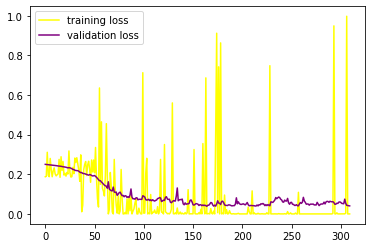

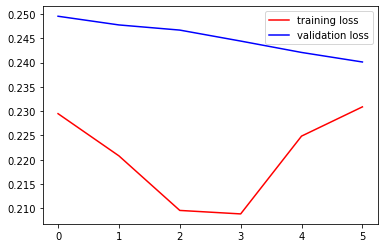

In [31]:
t1 = []
for i in training_loss:
  t1.append(i.cpu().item())


plt.plot(t1,'yellow', label="training loss")
plt.plot(validation_loss, 'purple', label="validation loss")
plt.legend()
plt.show()

t = []
v = []
for i in range(0,6):
  v.append(np.mean(validation_loss[i*3:(i+1)*3]))
  t.append(np.mean(t1[i*3:(i+1)*3]))

plt.plot(t,'red',label='training loss')
plt.plot(v, 'blue', label='validation loss')

plt.legend()
plt.show()

In [32]:
from functools import total_ordering
test_losses = [] # track loss
num_correct = 0
num_happy_correct = 0
num_surprise_correct = 0
total_h = 0
total_s = 0

# init hidden state
h = net.init_hidden(batch_size)

net.eval()
# iterate over test data
for inputs, labels in test_loader:

  # Creating new variables for the hidden state, otherwise
  # we'd backprop through the entire training history
  h = tuple([each.data for each in h])
  e=0

  if(train_on_gpu):
    inputs, labels_2 = inputs.cuda(), labels.cuda()

  output, h = net(inputs, h)

  # calculate loss
  test_loss = criterion(output, labels_2.float())
  test_losses.append(test_loss.item())

  # convert output probabilities to predicted class (0 or 1)
  #pred = torch.round(output.squeeze())  # rounds to the nearest integer
  # compare predictions to true label
  #correct_tensor = pred.eq(labels.view_as(pred))

  if labels[0].numpy()==1:
    total_h +=1
    if round(output.cpu().detach().numpy()[0],0) == 1:
      num_happy_correct += 1
      num_correct += 1
  if labels[0].numpy()==0:
    total_s +=1
    if round(output.cpu().detach().numpy()[0],0) == 0:
      num_surprise_correct += 1
      num_correct += 1

# -- stats! -- ##
# avg test loss
print("Test loss: {:.3f}".format(np.mean(test_losses)))

# accuracy over all test data

test_acc = num_correct/len(test_loader.dataset)
test_acc_h = num_happy_correct/total_h
test_acc_s = num_surprise_correct/total_s
print("Test accuracy: {:.3f}".format(test_acc))
print("Test happy accuracy: {:.6f}".format(test_acc_h))
print("Test surprise accuracy: {:.6f}".format(test_acc_s))

Test loss: 0.041
Test accuracy: 0.959
Test happy accuracy: 0.990476
Test surprise accuracy: 0.921348


In [33]:
import torch
from torch.utils.data import DataLoader, TensorDataset

#create Tensor Dataset
train_data=TensorDataset(torch.FloatTensor(train_x).to(torch.int64), torch.FloatTensor(train_y.to_numpy(dtype=np.float64)).to(torch.int64))
valid_data=TensorDataset(torch.FloatTensor(valid_x).to(torch.int64), torch.FloatTensor(valid_y.to_numpy(dtype=np.float64)).to(torch.int64))
test_data=TensorDataset(torch.FloatTensor(test_x).to(torch.int64), torch.FloatTensor(test_y.to_numpy(dtype=np.float64)).to(torch.int64))

#dataloader
batch_size=64
train_loader=DataLoader(train_data, batch_size=1, shuffle=True)
valid_loader=DataLoader(valid_data, batch_size=1, shuffle=True)
test_loader=DataLoader(test_data, batch_size=1, shuffle=True)

In [34]:
# obtain one batch of training data
dataiter = iter(train_loader)
sample_x, sample_y = dataiter.next()
print('Sample input size: ', sample_x.size()) # batch_size, seq_length
print('Sample input: \n', sample_x)
print('Sample label size: ', sample_y.size()) # batch_size
print('Sample label: \n', sample_y)

Sample input size:  torch.Size([1, 63])
Sample input: 
 tensor([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0, 6420,    1, 6421, 2588, 2588, 6422,  538,  202,
         1422, 6423, 6424]])
Sample label size:  torch.Size([1])
Sample label: 
 tensor([1])


##Clean the Ucraine-Russia dataset and use it for polarity testing

In [35]:
import re

all_tweets_u = list()
for t in data_emoji_1["tweet"]:
  t = 'a ' + t
  t = re.sub("(?:\s)@[^, ]*", '', t)
  t = t[2:]
  t = t.lower()
  t = "".join([ch for ch in t if ch not in punctuation])
  all_tweets_u.append(t)
all_text = " ".join(all_tweets_u)
all_words = all_text.split()

In [36]:
encoded_tweets=list()
iter_1 = 0
iter_2 = 0
for t in all_tweets_u:
  encoded_tweet=list()
  for word in t.split():
    if word not in vocab_to_int.keys():
      #if word is not available in vocab_to_int put 0 in that place
      encoded_tweet.append(0)
      iter_1 += 1
    else:
      iter_2 += 1
      encoded_tweet.append(vocab_to_int[word])
  encoded_tweets.append(encoded_tweet)
print(iter_1)
print(iter_2)
print(encoded_tweets[0])

471
805
[0, 0, 2, 0, 0, 109, 18, 171, 0, 1673, 15, 157, 21, 17, 59, 5, 674, 0, 0, 649, 0, 100, 730, 107, 564, 345, 5, 6562, 225, 806, 0, 0, 0, 0, 16, 7068, 0, 7068, 0, 431, 10, 2, 0, 806, 8, 70, 0, 0, 0]


In [37]:
sequence_length = 0
for i, tweet in enumerate(encoded_tweets):
  if len(tweet) > sequence_length:
    sequence_length = len(tweet)

features = []
for i, tweet in enumerate(encoded_tweets):
  tweet_len=len(tweet)
  if (tweet_len<=sequence_length):
    zeros=list(np.zeros(sequence_length-tweet_len))
    new=zeros+tweet
  else:
    new=tweet[:sequence_length]
  features.append(np.array(new))

In [38]:
import torch
from torch.utils.data import DataLoader, TensorDataset

test_x_u=features[:int(len(features))]
test_y_u=data_emoji_1["emotion"][:int(len(features))]

#create Tensor Dataset
test_data_u=TensorDataset(torch.FloatTensor(test_x_u).to(torch.int64), torch.FloatTensor(test_y_u.to_numpy(dtype=np.float64)).to(torch.int64))

#dataloader
batch_size=3
test_loader_u=DataLoader(test_data_u, batch_size=1, shuffle=True)

In [39]:
from functools import total_ordering
test_losses = [] # track loss
num_correct = 0
num_happy_correct = 0
num_surprise_correct = 0
total_h = 0
total_s = 0

# init hidden state
h = net.init_hidden(batch_size)

net.eval()
# iterate over test data
for inputs, labels in test_loader_u:

  # Creating new variables for the hidden state, otherwise
  # we'd backprop through the entire training history
  h = tuple([each.data for each in h])
  e=0

  if(train_on_gpu):
    inputs, labels_2 = inputs.cuda(), labels.cuda()

  output, h = net(inputs, h)

  # calculate loss
  test_loss = criterion(output, labels_2.float())
  test_losses.append(test_loss.item())

  # convert output probabilities to predicted class (0 or 1)
  #pred = torch.round(output.squeeze())  # rounds to the nearest integer
  # compare predictions to true label
  #correct_tensor = pred.eq(labels.view_as(pred))

  if labels[0].numpy()==1:
    total_h +=1
    if round(output.cpu().detach().numpy()[0],0) == 1:
      num_happy_correct += 1
      num_correct += 1
  if labels[0].numpy()==0:
    total_s +=1
    if round(output.cpu().detach().numpy()[0],0) == 0:
      num_surprise_correct += 1
      num_correct += 1

# -- stats! -- ##
# avg test loss
print("Test loss: {:.3f}".format(np.mean(test_losses)))

# accuracy over all test data

test_acc = num_correct/len(test_loader.dataset)
test_acc_h = num_happy_correct/total_h
test_acc_s = num_surprise_correct/total_s
print("Test accuracy: {:.3f}".format(test_acc))
print("Test happy accuracy: {:.6f}".format(test_acc_h))
print("Test surprise accuracy: {:.6f}".format(test_acc_s))

Test loss: 0.468
Test accuracy: 0.119
Test happy accuracy: 0.000000
Test surprise accuracy: 1.000000


##Ukraine Dataset with training

###Preparing Data Emotion Polarity 1

In [40]:
import re
from string import punctuation

all_tweets_emoji_1 = list()

for t in data_emoji_1["tweet"]:
  #t = 'a ' + t
  #t = re.sub("(?:\s)@[^, ]*", '', t)
  #t = re.sub("(?:\s)#[^, ]*", '', t)
  t = t[4:]
  t = t.lower()
  t = "".join([ch for ch in t if ch not in punctuation])
  all_tweets_emoji_1.append(t)

all_text = " ".join(all_tweets_emoji_1)
all_words = all_text.split()

In [41]:
from collections import Counter 
# Count all the words using Counter Method
count_words = Counter(all_words)
total_words=len(all_words)
sorted_words=count_words.most_common(total_words)
print("Top ten occuring words : ",sorted_words[:10])

Top ten occuring words :  [('the', 36), ('of', 27), ('a', 24), ('and', 22), ('russia', 21), ('ukraine', 19), ('to', 18), ('amp', 18), ('in', 15), ('for', 15)]


In [42]:
vocab_to_int={w:i+1 for i,(w,c) in enumerate(sorted_words)}

In [43]:
encoded_tweets=list()
iter_1 = 0
iter_2 = 0
for t in all_tweets_emoji_1:
  encoded_tweet=list()
  for word in t.split():
    if word not in vocab_to_int.keys():
      #if word is not available in vocab_to_int put 0 in that place
      encoded_tweet.append(0)
      iter_1 += 1
    else:
      iter_2 += 1
      encoded_tweet.append(vocab_to_int[word])
  encoded_tweets.append(encoded_tweet)
print(iter_1)
print(iter_2)
print(encoded_tweets[0])

0
1290
[9, 104, 1, 105, 156, 157, 63, 158, 159, 160, 10, 161, 106, 23, 162, 3, 163, 164, 165, 107, 166, 24, 167, 168, 169, 170, 3, 171, 172, 108, 173, 174, 175, 176, 15, 109, 177, 109, 178, 179, 9, 1, 105, 108, 2, 110, 180, 181, 182]


In [44]:
sequence_length = 0
for i, tweet in enumerate(encoded_tweets):
  if len(tweet) > sequence_length:
    sequence_length = len(tweet)

features_emoji_1 = []
for i, tweet in enumerate(encoded_tweets):
  tweet_len=len(tweet)
  if (tweet_len<=sequence_length):
    zeros=list(np.zeros(sequence_length-tweet_len))
    new=zeros+tweet
  else:
    new=tweet[:sequence_length]
  features_emoji_1.append(np.array(new))

###Train the model

In [45]:
train_x=features_emoji_1[:int(0.7*len(features_emoji_1))]
train_y=data_emoji_1["emotion"][:int(0.7*len(features_emoji_1))]
valid_x=features_emoji_1[int(0.7*len(features_emoji_1)):int(0.8*len(features_emoji_1))]
valid_y=data_emoji_1["emotion"][int(0.7*len(features_emoji_1)):int(0.8*len(features_emoji_1))]
test_x=features_emoji_1[int(0.8*len(features_emoji_1)):]
test_y=data_emoji_1["emotion"][int(0.8*len(features_emoji_1)):]
print(len(train_y), len(valid_y), len(test_y))

32 4 10


In [46]:
import torch
from torch.utils.data import DataLoader, TensorDataset

#create Tensor Dataset
train_data=TensorDataset(torch.FloatTensor(train_x).to(torch.int64), torch.FloatTensor(train_y.to_numpy(dtype=np.float64)).to(torch.int64))
valid_data=TensorDataset(torch.FloatTensor(valid_x).to(torch.int64), torch.FloatTensor(valid_y.to_numpy(dtype=np.float64)).to(torch.int64))
test_data=TensorDataset(torch.FloatTensor(test_x).to(torch.int64), torch.FloatTensor(test_y.to_numpy(dtype=np.float64)).to(torch.int64))

#dataloader
batch_size=64
train_loader=DataLoader(train_data, batch_size=1, shuffle=True)
valid_loader=DataLoader(valid_data, batch_size=1, shuffle=True)
test_loader=DataLoader(test_data, batch_size=1, shuffle=True)

In [47]:
# obtain one batch of training data
dataiter = iter(train_loader)
sample_x, sample_y = dataiter.next()
print('Sample input size: ', sample_x.size()) # batch_size, seq_length
print('Sample input: \n', sample_x)
print('Sample label size: ', sample_y.size()) # batch_size
print('Sample label: \n', sample_y)

Sample input size:  torch.Size([1, 54])
Sample input: 
 tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,  34, 274, 275,  35,  47,  96,  91, 276]])
Sample label size:  torch.Size([1])
Sample label: 
 tensor([0])


In [48]:
# Instantiate the model w/ hyperparams
vocab_size = len(vocab_to_int)+1 # +1 for the 0 padding
output_size = 1
embedding_dim = 400
hidden_dim = 256
n_layers = 1

net = SentimentalLSTM(vocab_size, output_size, embedding_dim, hidden_dim, n_layers)
print(net)

SentimentalLSTM(
  (embedding): Embedding(624, 400)
  (lstm): LSTM(400, 256, batch_first=True, dropout=0.5)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc1): Linear(in_features=256, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=16, bias=True)
  (fc3): Linear(in_features=16, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/rnn.py:65: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


In [49]:
import torch
# loss and optimization functions
lr=0.0001

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=lr, weight_decay=0.0001)

# check if CUDA is available
train_on_gpu = torch.cuda.is_available()

# training params

epochs = 20# 3-4 is approx where I noticed the validation loss stop decreasing

training_loss=[]
validation_loss=[]

counter = 0
print_every = 20
clip=5 # gradient clipping

# move model to GPU, if available
if(train_on_gpu):
    net.cuda()

net.train()
# train for some number of epochs
for e in range(epochs):
    # initialize hidden state
    h = net.init_hidden(batch_size)

    # batch loop
    for inputs, labels in train_loader:
        counter += 1

        if(train_on_gpu):
            inputs=inputs.cuda()
            labels=labels.cuda()
        # Creating new variables for the hidden state, otherwise
        # we'd backprop through the entire training history
        h = tuple([each.data for each in h])

        # zero accumulated gradients
        net.zero_grad()

        # get the output from the model
        output, h = net(inputs, h)

        # calculate the loss and perform backprop
        loss = criterion(output.squeeze(), labels.float())
        loss.backward()
        # `clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
        nn.utils.clip_grad_norm_(net.parameters(), clip)
        optimizer.step()

        # loss stats
        if counter % print_every == 0:
            # Get validation loss
            val_h = net.init_hidden(batch_size)
            val_losses = []
            net.eval()
            error = 0
            for inputs, labels in valid_loader:

                # Creating new variables for the hidden state, otherwise
                # we'd backprop through the entire training history
                val_h = tuple([each.data for each in val_h])
                if(train_on_gpu):
                  inputs, labels = inputs.cuda(), labels.cuda()  
                
                output, val_h = net(inputs, val_h)
                val_loss = criterion(output.squeeze(), labels.float())

                val_losses.append(val_loss.item())
                
            training_loss.append(loss)
            validation_loss.append(np.mean(val_losses))
            net.train()
            print("Epoch: {}/{}...".format(e+1, epochs),
                  "Step: {}...".format(counter),
                  "Loss: {:.6f}...".format(loss.item()),
                  "Val Loss: {:.6f}".format(np.mean(val_losses)))


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:529: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch: 1/20... Step: 20... Loss: 0.184772... Val Loss: 0.220041
Epoch: 2/20... Step: 40... Loss: 0.184105... Val Loss: 0.214878
Epoch: 2/20... Step: 60... Loss: 0.300240... Val Loss: 0.211943
Epoch: 3/20... Step: 80... Loss: 0.172766... Val Loss: 0.206804
Epoch: 4/20... Step: 100... Loss: 0.263524... Val Loss: 0.201254
Epoch: 4/20... Step: 120... Loss: 0.230350... Val Loss: 0.196164
Epoch: 5/20... Step: 140... Loss: 0.191148... Val Loss: 0.185135
Epoch: 5/20... Step: 160... Loss: 0.154605... Val Loss: 0.177341
Epoch: 6/20... Step: 180... Loss: 0.123221... Val Loss: 0.168571
Epoch: 7/20... Step: 200... Loss: 0.135970... Val Loss: 0.158677
Epoch: 7/20... Step: 220... Loss: 0.153982... Val Loss: 0.149437
Epoch: 8/20... Step: 240... Loss: 0.225226... Val Loss: 0.131470
Epoch: 9/20... Step: 260... Loss: 0.138337... Val Loss: 0.117615
Epoch: 9/20... Step: 280... Loss: 0.097947... Val Loss: 0.106647
Epoch: 10/20... Step: 300... Loss: 0.084483... Val Loss: 0.088830
Epoch: 10/20... Step: 320...

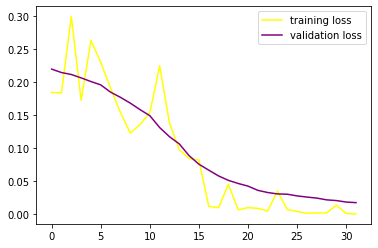

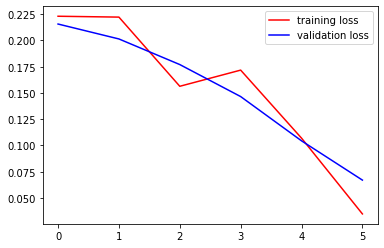

In [50]:
t1 = []
for i in training_loss:
  t1.append(i.cpu().item())


plt.plot(t1,'yellow', label="training loss")
plt.plot(validation_loss, 'purple', label="validation loss")
plt.legend()
plt.show()

t = []
v = []
for i in range(0,6):
  v.append(np.mean(validation_loss[i*3:(i+1)*3]))
  t.append(np.mean(t1[i*3:(i+1)*3]))

plt.plot(t,'red',label='training loss')
plt.plot(v, 'blue', label='validation loss')

plt.legend()
plt.show()

###Test the model

In [51]:
from functools import total_ordering
test_losses = [] # track loss
num_correct = 0
num_happy_correct = 0
num_surprise_correct = 0
total_h = 0
total_s = 0

# init hidden state
h = net.init_hidden(batch_size)

net.eval()
# iterate over test data
for inputs, labels in test_loader:

  # Creating new variables for the hidden state, otherwise
  # we'd backprop through the entire training history
  h = tuple([each.data for each in h])
  e=0

  if(train_on_gpu):
    inputs, labels_2 = inputs.cuda(), labels.cuda()

  output, h = net(inputs, h)

  # calculate loss
  test_loss = criterion(output, labels_2.float())
  test_losses.append(test_loss.item())

  # convert output probabilities to predicted class (0 or 1)
  #pred = torch.round(output.squeeze())  # rounds to the nearest integer
  # compare predictions to true label
  #correct_tensor = pred.eq(labels.view_as(pred))

  if labels[0].numpy()==1:
    total_h +=1
    if round(output.cpu().detach().numpy()[0],0) == 1:
      num_happy_correct += 1
      num_correct += 1
  if labels[0].numpy()==0:
    total_s +=1
    if round(output.cpu().detach().numpy()[0],0) == 0:
      num_surprise_correct += 1
      num_correct += 1

# -- stats! -- ##
# avg test loss
print("Test loss: {:.3f}".format(np.mean(test_losses)))

# accuracy over all test data

test_acc = num_correct/len(test_loader.dataset)
test_acc_h = num_happy_correct/total_h
test_acc_s = num_surprise_correct/total_s
print("Test accuracy: {:.3f}".format(test_acc))
print("Test happy accuracy: {:.6f}".format(test_acc_h))
print("Test surprise accuracy: {:.6f}".format(test_acc_s))

Test loss: 0.065
Test accuracy: 0.900
Test happy accuracy: 0.833333
Test surprise accuracy: 1.000000
